In [1]:
from __future__ import print_function
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from keras.models import Sequential
from sklearn.cross_validation import  train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import math
import seaborn as sns
import matplotlib.ticker as mticker
from matplotlib.finance import candlestick_ohlc

# to not display the warnings of tensorflow
import os
os.environ['TF_CPP_MIN_LOG_LEVEL']='2'

Using TensorFlow backend.
C:\Users\Harish Sagadevan\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\Harish Sagadevan\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: The finance module has been deprecated in mpl 2.0 and will be removed in mpl 2.2. Please use the module mpl_finance instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


In [2]:
look_back = 7
epochs = 1000
batch_size = 32

In [3]:
np.random.seed(7)


In [4]:
prices_dataset =  pd.read_csv('C:/Users/Harish Sagadevan/Anaconda3/My Script kag/Bifinex Data.csv', header=0)
prices_dataset =prices_dataset.set_index('Date')
sns.heatmap(prices_dataset.corr(), annot=True, cmap='RdYlGn', linewidths=0.5, vmin=1 )

In [5]:
prices = prices_dataset.Close.values.astype('float32')
prices =prices.reshape(len(prices), 1)

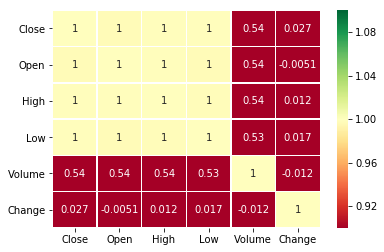

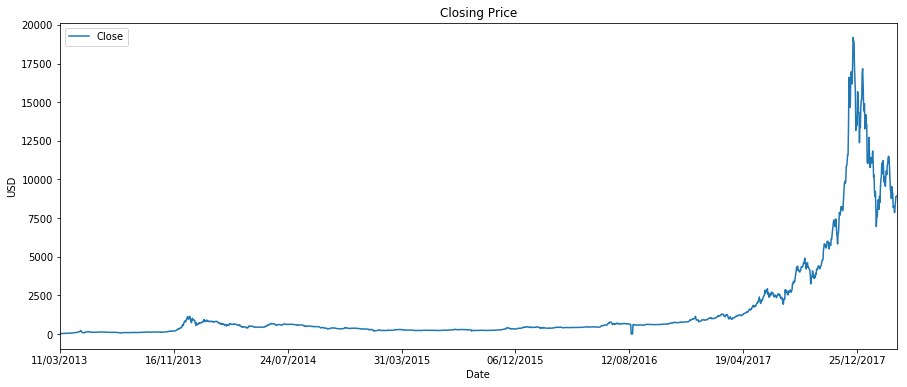

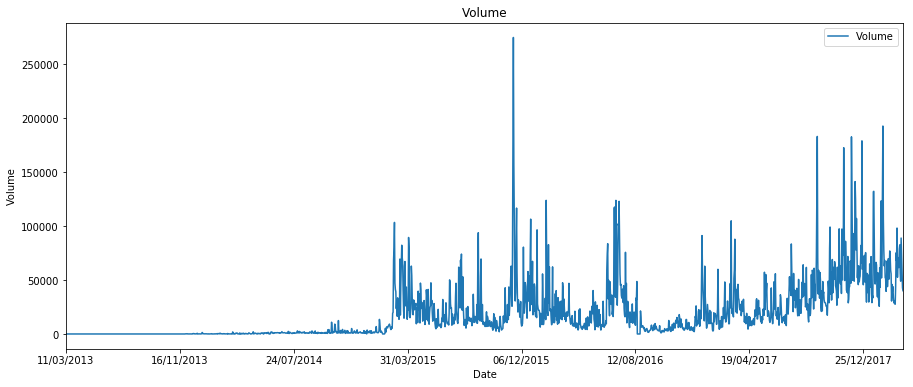

In [6]:
plt.show()
prices_dataset['Close'].plot(figsize=(15, 6))
plt.title('Closing Price')
plt.ylabel('USD')
plt.xlabel('Date')
plt.legend()
plt.show()
prices_dataset['Volume'].plot(figsize=(15, 6))
plt.title('Volume')
plt.ylabel('Volume')
plt.xlabel('Date')
plt.legend()
plt.show()

In [7]:
scaler = MinMaxScaler(feature_range=(0, 1))
prices = scaler.fit_transform(prices)

In [8]:
train_size = int(len(prices) * 0.8)
test_size = len(prices) - train_size
train, test =prices[0:train_size,:], prices[train_size:len(prices),:]

In [9]:
print('Split data into training set and test set... Number of training samples/ test samples:', len(train), len(test))

Split data into training set and test set... Number of training samples/ test samples: 1470 368


In [10]:
def create_dataset(dataset, look_back):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)

In [11]:
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = np.reshape(testX, (testX.shape[0], testX.shape[1], 1))


In [12]:
model = Sequential()
model.add(LSTM(4, input_shape=(look_back, 1)))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam',metrics=['mae'])
model.fit(trainX, trainY, nb_epoch=epochs, batch_size=batch_size,verbose=0)
metrics = model.evaluate(trainX,trainY)
print('Results using Closing Price(Train): ')
print("loss:" , (metrics[1]))
metrics = model.evaluate(testX,testY)
print('Results using Closing Price(Test): ')
print("loss: " , (metrics[1]))


C:\Users\Harish Sagadevan\Anaconda3\lib\site-packages\keras\models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


1462/1462 [==============================] - 0s 153us/step
Results using Closing Price(Train): 
loss: 0.000807201034656
360/360 [==============================] - 0s 83us/step
Results using Closing Price(Test): 
loss:  0.019597138123


In [13]:
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

In [14]:
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

In [15]:
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 33.28 RMSE
Test Score: 627.64 RMSE


In [16]:
# shift predictions of training data for plotting
trainPredictPlot = np.empty_like(prices)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

# shift predictions of test data for plotting
testPredictPlot = np.empty_like(prices)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(prices)-1, :] = testPredict

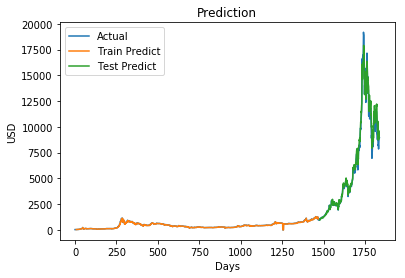

>Predicted=1063.712, Expected=958
>Predicted=957.669, Expected=1035
>Predicted=1034.578, Expected=1030
>Predicted=1029.582, Expected=1031
>Predicted=1030.987, Expected=1030
>Predicted=1030.037, Expected=1072
>Predicted=1071.771, Expected=1080
>Predicted=1080.154, Expected=1097
>Predicted=1096.669, Expected=1139
>Predicted=1139.303, Expected=1131
>Predicted=1131.408, Expected=1130
>Predicted=1130.486, Expected=1182
>Predicted=1182.395, Expected=1183
>Predicted=1182.971, Expected=1178
>Predicted=1177.692, Expected=1207
>Predicted=1206.992, Expected=1209
>Predicted=1208.571, Expected=1226
>Predicted=1226.042, Expected=1216
>Predicted=1216.470, Expected=1177
>Predicted=1177.479, Expected=1201
>Predicted=1200.840, Expected=1183
>Predicted=1182.500, Expected=1205
>Predicted=1204.539, Expected=1230
>Predicted=1229.866, Expected=1255
>Predicted=1254.585, Expected=1249
>Predicted=1248.880, Expected=1300
>Predicted=1300.312, Expected=1313
>Predicted=1312.652, Expected=1338
>Predicted=1337.613, E

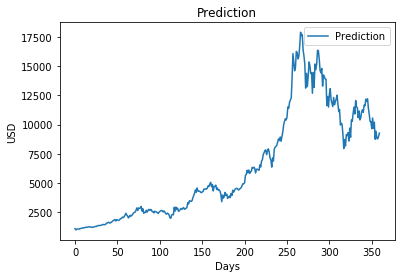

In [17]:
plt.plot(scaler.inverse_transform(prices))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.title('Prediction')
plt.ylabel('USD')
plt.xlabel('Days')
plt.legend(['Actual', 'Train Predict','Test Predict'], loc='upper left')
plt.show()

history = [x for x in trainPredict]
predictions = list()
for i in range(len(testPredict)):
	# predict
	yhat = history[-1]
	predictions.append(yhat)
	# observation
	obs = testPredict[i]
	history.append(obs)
	print('>Predicted=%.3f, Expected=%3.f' % (yhat, obs))
    
plt.plot(predictions)
plt.title('Prediction')
plt.legend(['Prediction'])
plt.ylabel('USD')
plt.xlabel('Days')
plt.show()

